## loading  packages

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectFromModel
from sklearn.impute import SimpleImputer
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns',100)

### Loading data

In [104]:
dir = 'C:/Users/rsh15/Desktop/seunghuni/dataset/porto_seguro/'
train = pd.read_csv(dir+'train.csv')
test  = pd.read_csv(dir+'test.csv')

### Data at first sight

In [105]:
# Here is an excerpt of the the data description for the competition:
# features that belong to similar groupings are tagged as such in the feature names(e.g ind,reg,car,calc)
# feature names include the postfix bin to indicate binary features and cat to indicate categorical features.
# features without these designations are either continuous or ordinal.
# values of -1 indicate that the feature was missing from the observation
# the target columns signifies whether or not a claim was filed for that policy holder

In [106]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [107]:
# we indeed see the following
# binary variables
# categorical variables of which the category values are integers
# other variables with integer or float values
# variables with integer or float values
# the target variable and an ID variable

In [108]:
train.shape

(595212, 59)

In [109]:
train.drop_duplicates()
train.shape

(595212, 59)

In [110]:
test.shape

(892816, 58)

In [111]:
# one missing variable is the target variable

In [112]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

## Metadata

In [113]:
# meta data
data = []
for f in train.columns:
    # defining the role
    if f == 'target':
        role = 'target'
    elif f == 'id':
        role = 'id'
    else:
        role = 'input'
        
    # defining the level
    if 'bin' in f or f =='target':
        level = 'binary'
    elif 'cat' in f or f == 'id':
        level = 'nominal'
    elif train[f].dtype == float:
        level = 'interval'
    elif train[f].dtype == 'int64':
        level = 'ordinal'
        
    # initialize keep to true for all variables except for id
    keep = True
    if f == 'id':
        keep = False
    
    # defining the data type
    dtype = train[f].dtype
    
    # creating a dict that contains all the metadata for the variable
    f_dict = {
        'varname':f,
        'role':role,
        'level':level,
        'keep':keep,
        'dtype':dtype
    }
    data.append(f_dict)
    
meta = pd.DataFrame(data,columns = ['varname','role','level','keep','dtype'])
meta.set_index('varname',inplace=True)

In [114]:
meta

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


In [115]:
meta[(meta.level == 'nominal') & (meta.keep)].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

In [116]:
pd.DataFrame({'count':meta.groupby(['role','level'])['role'].size()}).reset_index()

,role,level,count
0,id,nominal,1
1,input,binary,17
2,input,interval,10
3,input,nominal,14
4,input,ordinal,16
5,target,binary,1


## Descriptive Statistics

### interval variables

In [117]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
train[v].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


In [118]:
# reg variables
# - only ps_reg_03 has missing values
# - the range(min to max) differs between the variables. we could apply scaling(eg. StandardScaler),
# - but it depends on the classifier we will want to see.

# car variables
# - ps_car_12 and ps_car_15 have missing values
# - again, the range differs and we could apply scaling

# calc variables
# - no missing values
# - this seems to be some kind of ratio as the maximum is 0.9
# all three _calc variables have very similar distributions

# overall - we can see that the range of the interval variables is rather small.
#         - perhaps some transformation is already applied in order to anaoymize the data? 

### ordinal variables

In [119]:
v = meta[(meta.level == 'ordinal') & (meta.keep)].index
train[v].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,2.346072,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,0.832548,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,3.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


In [120]:
# only one missing variable ps_car_11
# we could apply scaling to deal with different ranges

### binary variables

In [121]:
v = meta[(meta.level == 'binary') & (meta.keep)].index
train[v].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [122]:
# a priori in the train data is 3.645%, which is strongly imbalanced.
# from the means we can conclude that for most variables the value is zero in most cases.

## Handling imbalanced classes

In [123]:
# as we mentioned above the proportion of records with target=1 is far less than target=0.
# this can lead to a model that has great accuracy but does have any added value in practice.
# two possible strategies to deal with this problem are.
# - oversampling records with target=1
# - undersampling records with target=0

In [124]:
desired_apriori = 0.10

# get the indices per target value
idx_0 = train[train.target==0].index
idx_1 = train[train.target==1].index

# get original number of records per target value
nb_0 = len(train.loc[idx_0])
nb_1 = len(train.loc[idx_1])

# calculate the undersampling rate and resulting number of records with target=0
undersampling_rate = ((1-desired_apriori)*nb_1) / (nb_0 *desired_apriori)
undersampled_nb_0 = int(undersampling_rate*nb_0)
print('rate to undersample records with target=0: {}'.format(undersampling_rate))
print('number of records with target=0 after undersampling: {}'.format(undersampled_nb_0))

# randomly select records with target=0 to get at the desired a priori
undersampled_idx = shuffle(idx_0,random_state=37,n_samples=undersampled_nb_0)

# construct list with remaining indices
idx_list = list(undersampled_idx) + list(idx_1)

# return undersample data frame
train = train.loc[idx_list].reset_index(drop=True)

rate to undersample records with target=0: 0.34043569687437886
number of records with target=0 after undersampling: 195246


In [125]:
train['target'].value_counts()

0    195246
1     21694
Name: target, dtype: int64

## Data Quality checks

### checking missing values

In [126]:
vars_with_missing = []

for f in train.columns:
    missings = train[train[f] == -1][f].count()
    if missings > 0:
        vars_with_missing.append(f)
        missing_perc = missings/train.shape[0]
        print('variable {} has {} records ({:.2%}) with missing values'.format(f,missings,missing_perc))

print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

variable ps_ind_02_cat has 103 records (0.05%) with missing values
variable ps_ind_04_cat has 51 records (0.02%) with missing values
variable ps_ind_05_cat has 2256 records (1.04%) with missing values
variable ps_reg_03 has 38580 records (17.78%) with missing values
variable ps_car_01_cat has 62 records (0.03%) with missing values
variable ps_car_02_cat has 2 records (0.00%) with missing values
variable ps_car_03_cat has 148367 records (68.39%) with missing values
variable ps_car_05_cat has 96026 records (44.26%) with missing values
variable ps_car_07_cat has 4431 records (2.04%) with missing values
variable ps_car_09_cat has 230 records (0.11%) with missing values
variable ps_car_11 has 1 records (0.00%) with missing values
variable ps_car_14 has 15726 records (7.25%) with missing values
In total, there are 12 variables with missing values


In [127]:
# ps_car_03_cat and ps_car_05_cat have a large proportion of records with missing values. remove those variables
# for the other categorical variables with missing values, we can leave the missing value -1 as such.
# ps_reg_03 (continuous) has missing values for 18% of all records. replace by the mean.
# ps_car_11 (ordinal) has only 5 records with missing values. replace by the mode.
# ps_car_12 (continuous) has only 1 records with missing value. replace by the mean.
# ps_car_14 (continuous) has missing values for 7% of all records. replace by the mean

In [128]:
# dropping the variables with too many missing values
vars_to_drop = ['ps_car_03_cat','ps_car_05_cat']
train.drop(vars_to_drop,inplace=True,axis=1)
meta.loc[(vars_to_drop),'keep'] = False # updating the meta.

# imputing with the mean or mode
mean_imp = SimpleImputer(missing_values=-1,strategy='mean')
mode_imp = SimpleImputer(missing_values=-1,strategy='most_frequent')
train['ps_reg_03'] = mean_imp.fit_transform(train[['ps_reg_03']]).ravel()
train['ps_car_12'] = mean_imp.fit_transform(train[['ps_car_12']]).ravel()
train['ps_car_14'] = mean_imp.fit_transform(train[['ps_car_14']]).ravel()
train['ps_car_11'] = mode_imp.fit_transform(train[['ps_car_11']]).ravel()

### checking the cardinality of the categoricla variables

In [129]:
# cardinality refers to the number of different values in a variable.
# as we will create dummy variables from the categorical variables later on, we need to check whether there are variables
# with many distinct values.
# we should handle these variables differently as they would result in many dummy variables.

In [131]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
    dist_values = train[f].value_counts().shape[0]
    print('variable {} has {} distinct values'.format(f,dist_values))

variable ps_ind_02_cat has 5 distinct values
variable ps_ind_04_cat has 3 distinct values
variable ps_ind_05_cat has 8 distinct values
variable ps_car_01_cat has 13 distinct values
variable ps_car_02_cat has 3 distinct values
variable ps_car_04_cat has 10 distinct values
variable ps_car_06_cat has 18 distinct values
variable ps_car_07_cat has 3 distinct values
variable ps_car_08_cat has 2 distinct values
variable ps_car_09_cat has 6 distinct values
variable ps_car_10_cat has 3 distinct values
variable ps_car_11_cat has 104 distinct values


In [132]:
# only ps_car_11_cat has many distinct values, although it is still reasonable.

In [133]:
# script by https://www.kaggle.com/ogrellier
# Code: https://www.kaggle.com/ogrellier/python-target-encoding-for-categorical-features
def add_noise(series,noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series = None,
                  tst_series = None,
                  target = None,
                  min_samples_leaf = 1,
                  smoothing = 1,
                  noise_level = 0):
    """
    smoothing is computed like in the following paper by daniele micci-barreca.
    https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
    trn_series : training categorical feature as a pd.Series
    tst_series : test categorical feature as a pd.Series
    target : target data as a pd.Series
    min_samples_leaf (int) : minimum samples to take category average into account
    smoothing (int) : smoothing effect to balance categorical average vs prior  
    """
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series,target],axis=1)
    
    # compute target mean
    averages = temp.groupby(trn_series.name)[target.name].agg(['mean','count'])
    
    # compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages['count'] - min_samples_leaf) / smoothing))
    
    # apply averages to trn and tst series
    prior = target.mean()
    
    # the bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages['mean'] * smoothing
    averages.drop(['mean','count'],axis=1,inplace=True)
    
    # apply averages to trn and tst series
    ft_trn_series = pd.merge(
                        trn_series.to_frame(trn_series.name),
                        averages.reset_index().rename(columns={'index':target.name,
                                                               target.name:'average'}),
                        on = trn_series.name,
                        how = 'left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index
    ft_tst_series = pd.merge(
                    tst_series.to_frame(tst_series.name),
                    averages.reset_index().rename(columns={'index':target.name,
                                                           target.name:'average'}),
                    on = tst_series.name,
                    how = 'left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    
    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [135]:
train_encoded, test_encoded = target_encode(train['ps_car_11_cat'],
                                            test['ps_car_11_cat'],
                                            target=train.target,
                                            min_samples_leaf=100,
                                            smoothing=10,
                                            noise_level=0.01)

train['ps_car_11_cat_te'] = train_encoded
train.drop('ps_car_11_cat',axis=1,inplace=True)
meta.loc['ps_car_11_cat','keep'] = False # updating meta
test['ps_car_11_cat_te'] = test_encoded
test.drop('ps_car_11_cat',axis=1,inplace=True)

## Exploratory Data Visualization

### categorical variables

<ipython-input-136-ebf2e4a85cf0>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

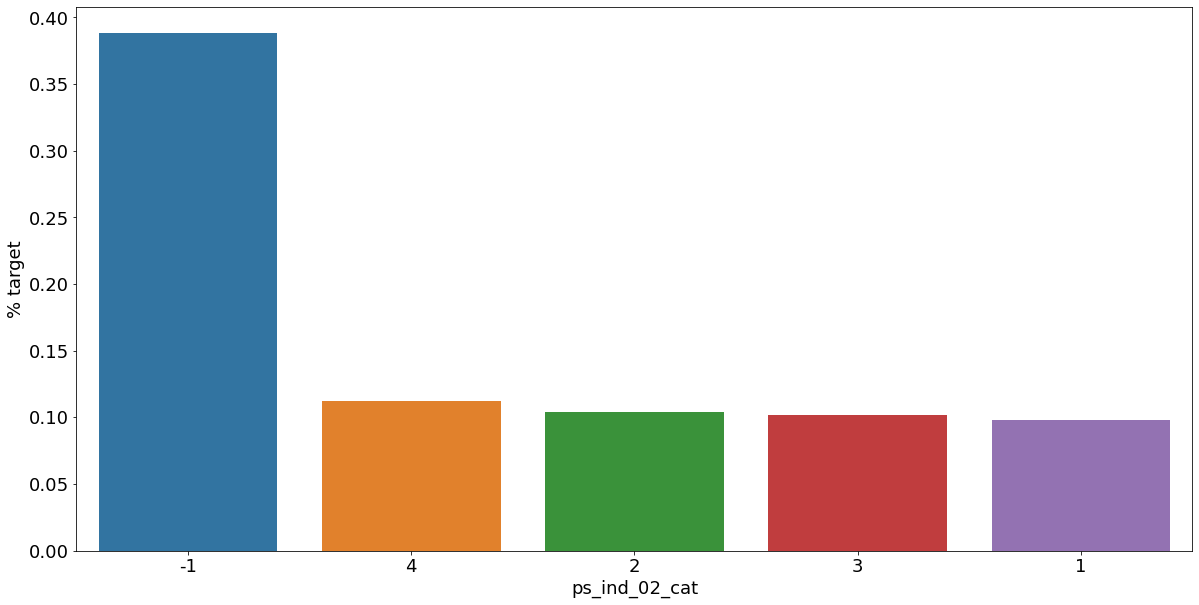

<Figure size 432x288 with 0 Axes>

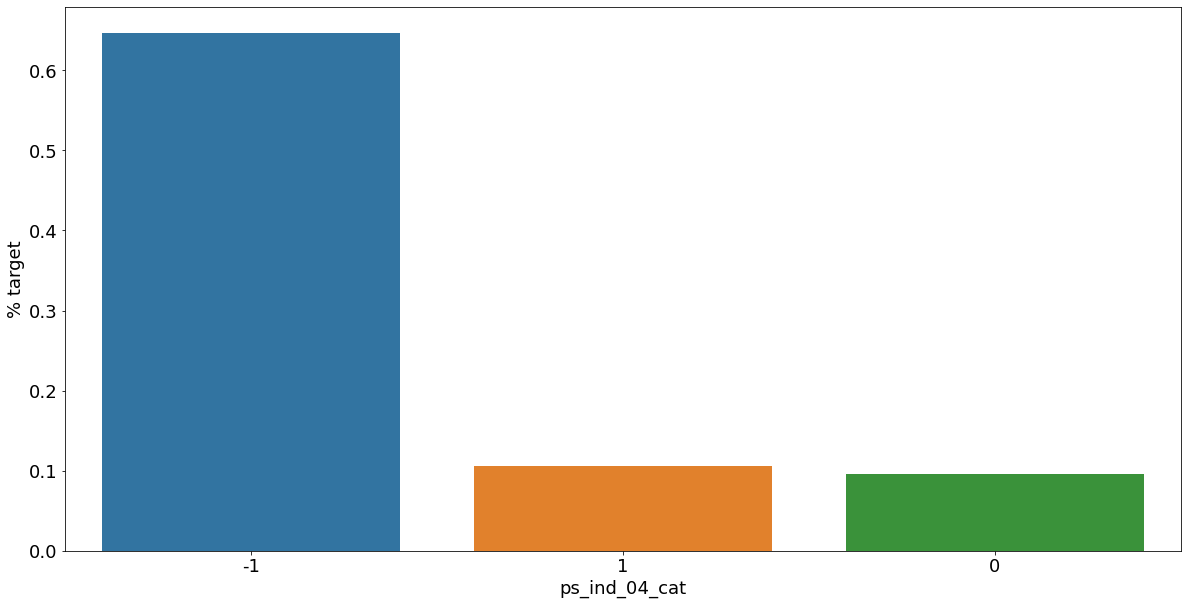

<Figure size 432x288 with 0 Axes>

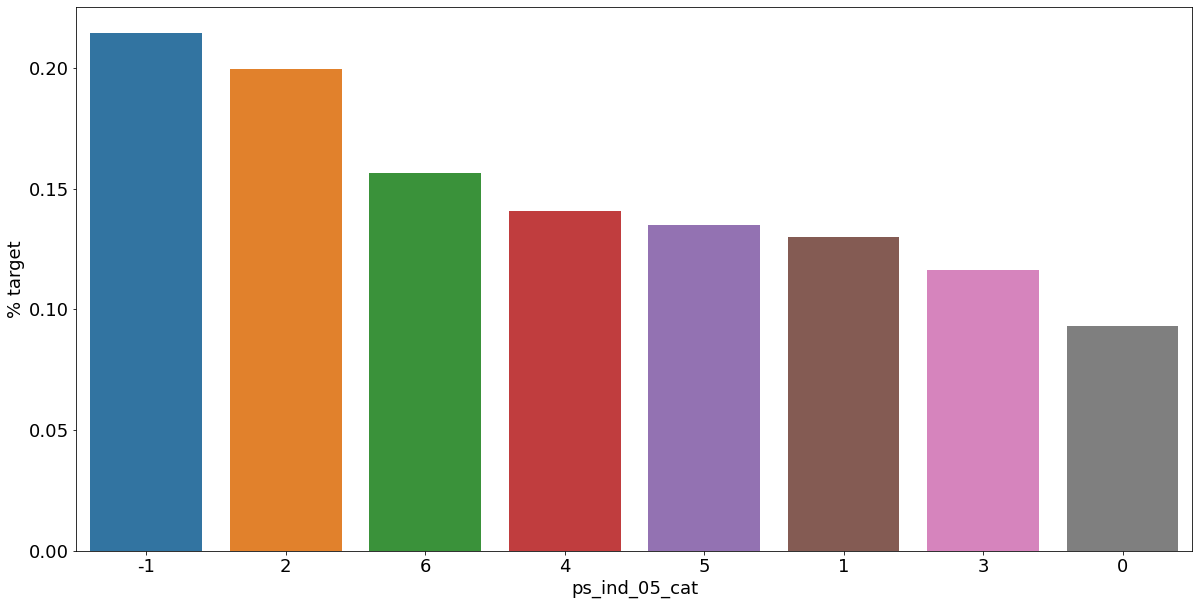

<Figure size 432x288 with 0 Axes>

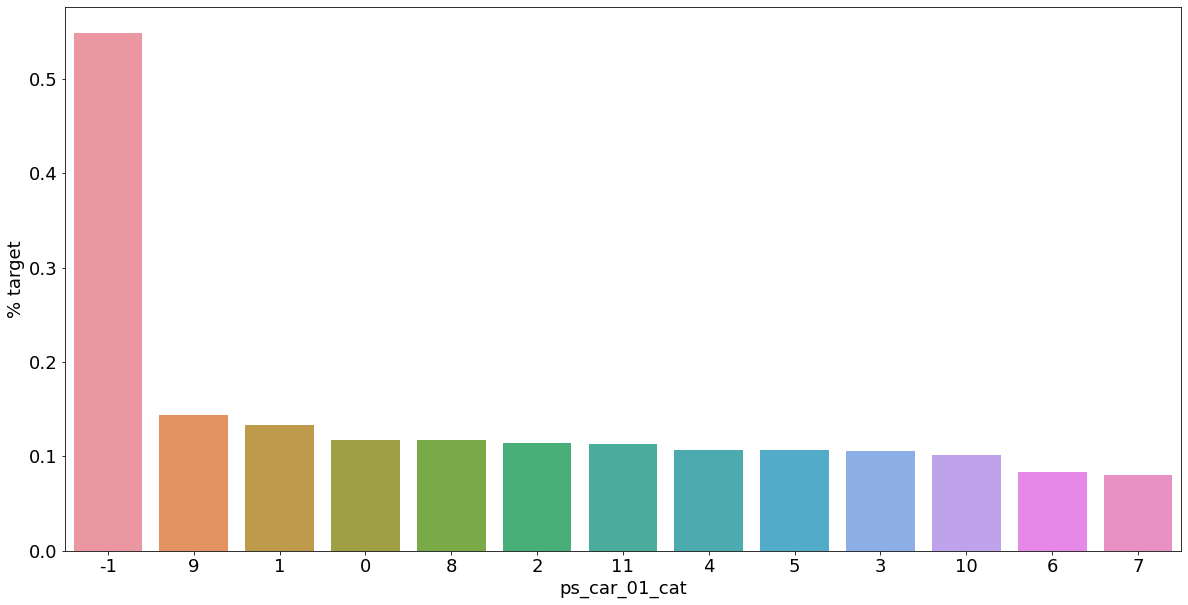

<Figure size 432x288 with 0 Axes>

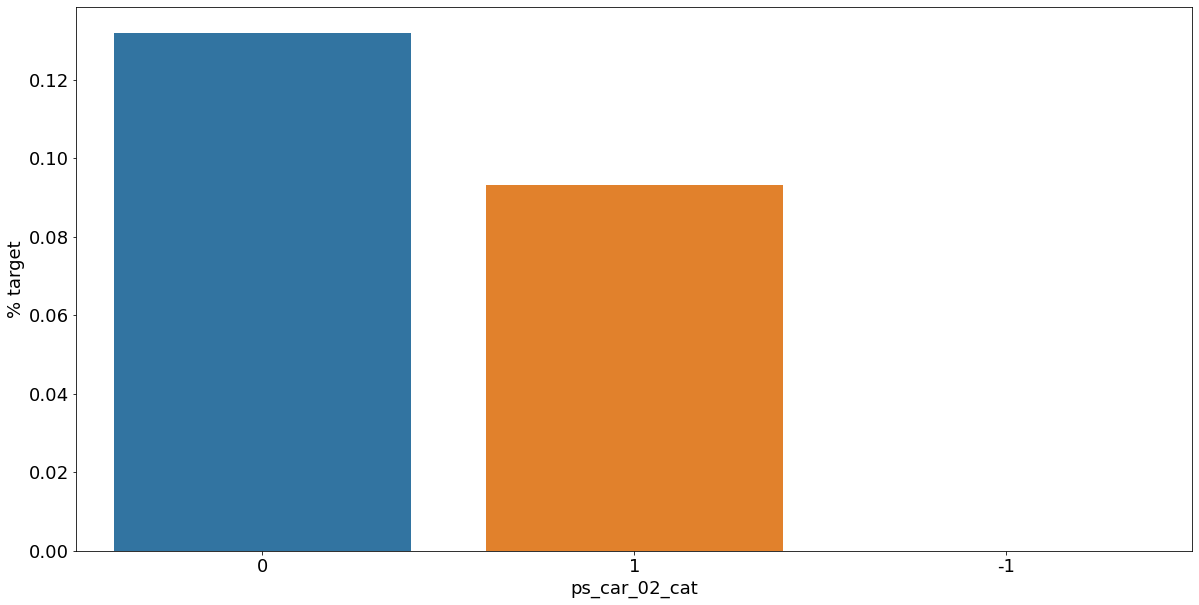

<Figure size 432x288 with 0 Axes>

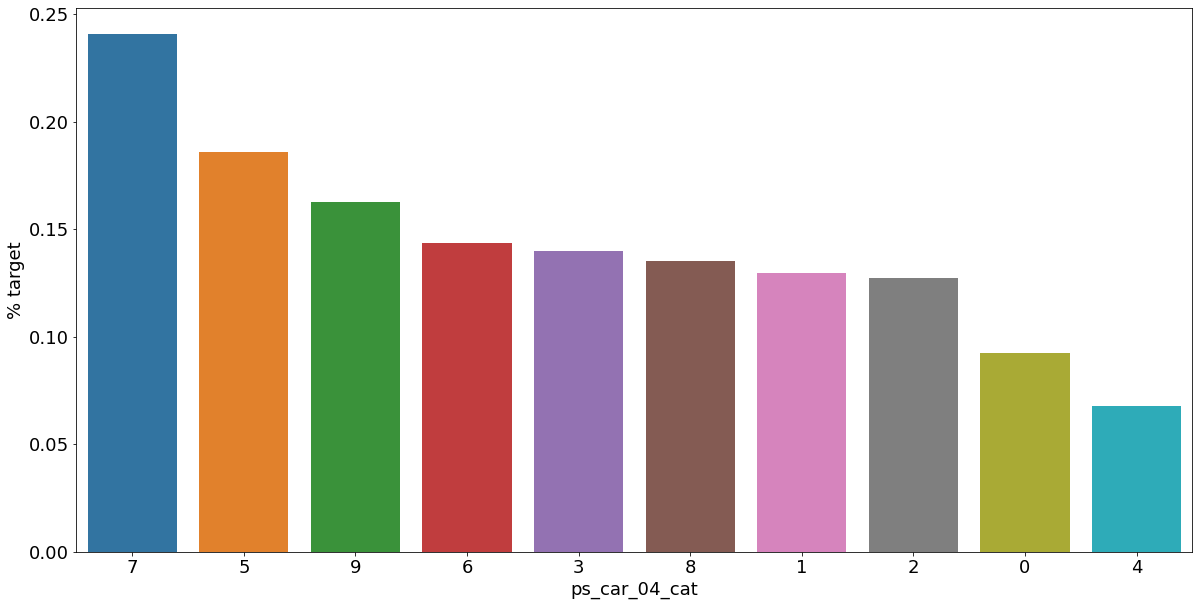

<Figure size 432x288 with 0 Axes>

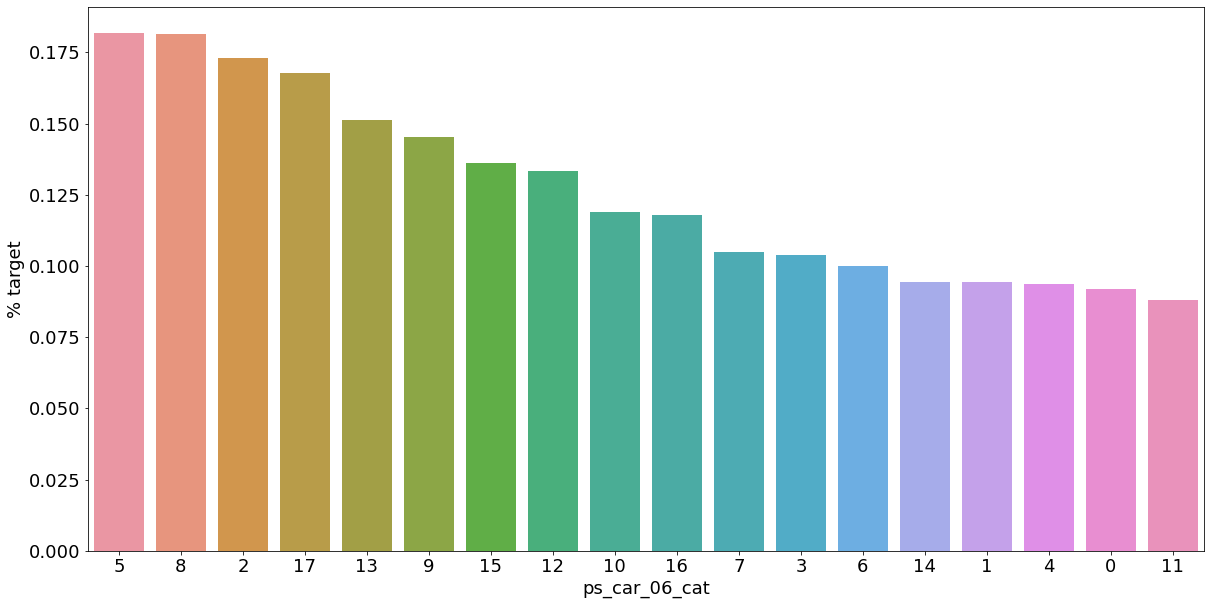

<Figure size 432x288 with 0 Axes>

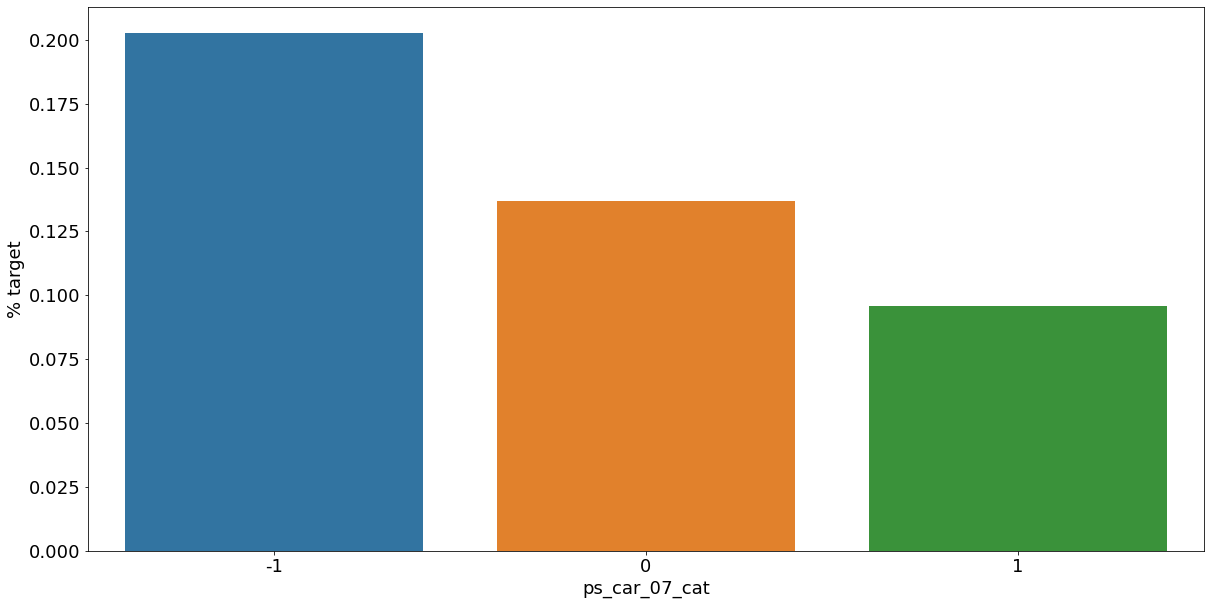

<Figure size 432x288 with 0 Axes>

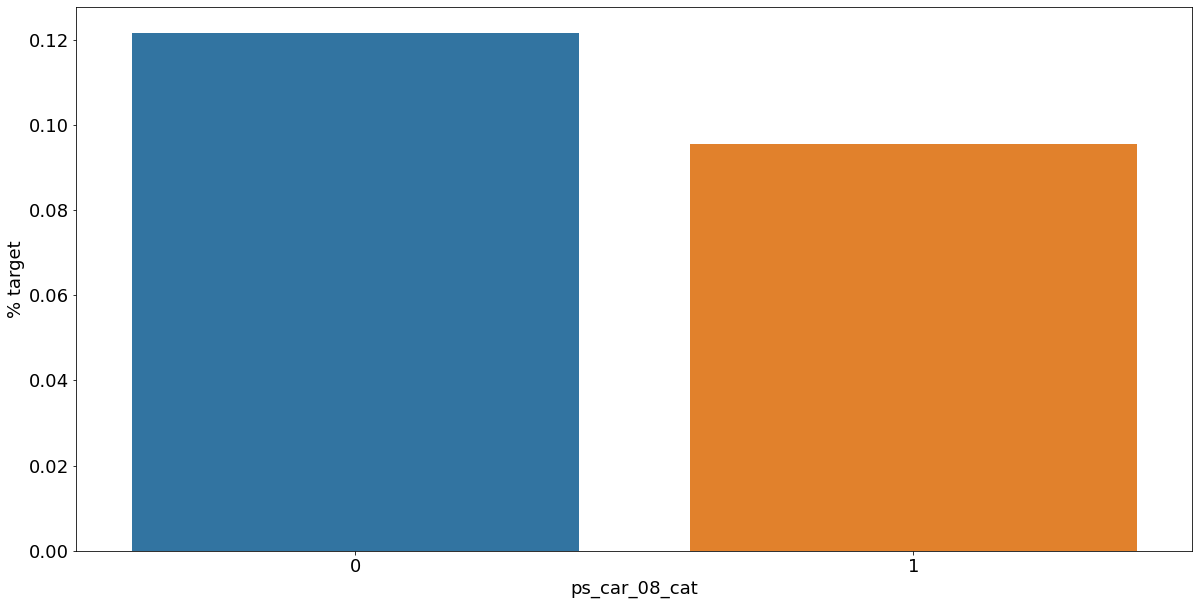

<Figure size 432x288 with 0 Axes>

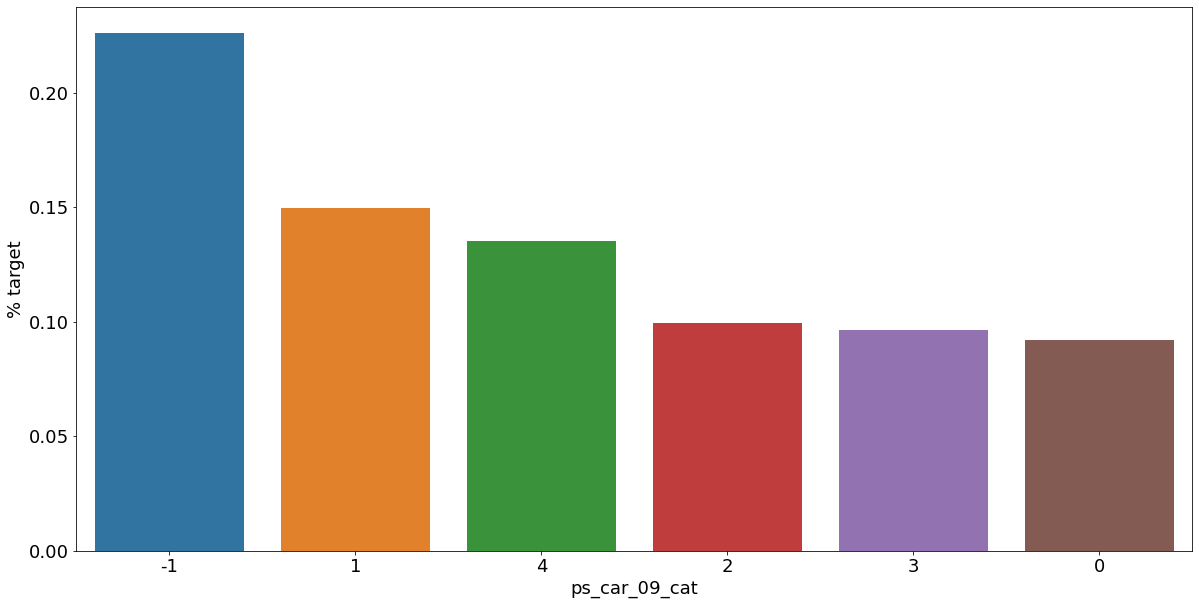

<Figure size 432x288 with 0 Axes>

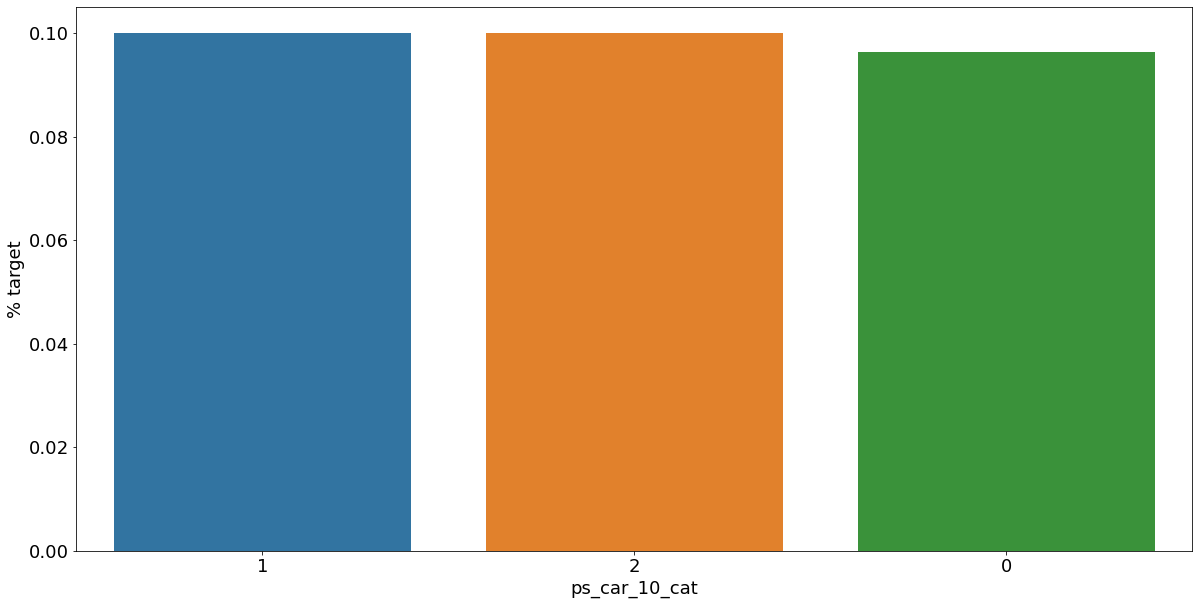

In [136]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
    plt.figure()
    fig,ax = plt.subplots(figsize=(20,10))
    # calculate the percentage of target=1 per category value
    cat_perc = train[[f,'target']].groupby([f],as_index=False).mean()
    cat_perc.sort_values('target',ascending=False,inplace=True)
    
    # barplot
    # order the bars descending on target mean
    sns.barplot(ax=ax,x=f,y='target',data=cat_perc,order=cat_perc[f])
    plt.ylabel('% target',fontsize=18)
    plt.xlabel(f,fontsize=18)
    plt.tick_params(axis='both',which='major',labelsize=18)

In [137]:
# as we can see from the variables with missing values
# its good idea to keep the missing values as a seperate category value, instead of replacing them by the mode for instance
# the customers with missing value appear to have a much higher(in some cases lower) probability to ask for insurance claim

### interval variabels

In [138]:
# checking correlations between interval variables.
# a heatmap is a good way to visualize the correlation between variables

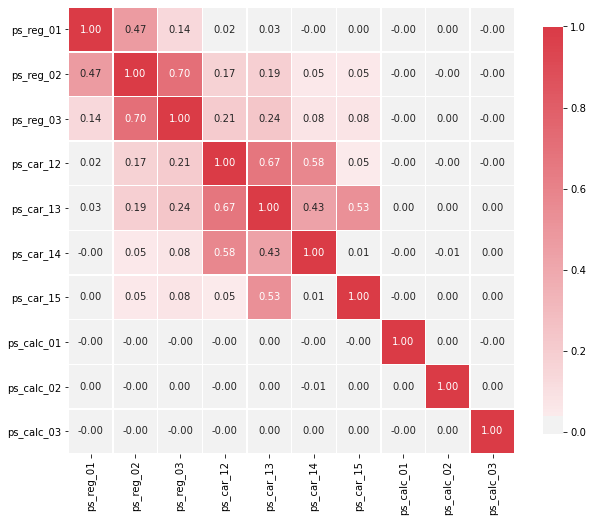

In [141]:
def corr_heatmap(v):
    correlations = train[v].corr()
    
    # create color map ranging between two colors
    cmap = sns.diverging_palette(220,10,as_cmap=True)
    
    fig,ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
                square=True,linewidths=0.5,annot=True,cbar_kws={'shrink':.75})
    plt.show()

v = meta[(meta.level == 'interval') & (meta.keep)].index
corr_heatmap(v)

In [142]:
# there are a strong correlations between the variables:
# ps_reg_02 and ps_reg_03 (0.7)
# ps_car_12 and ps_car_13 (0.67)
# ps_car_12 and ps_car_14 (0.58)
# ps_Car_13 and ps_car_15 (0.67)

In [ ]:
# seaborn has some handy plots to visualize linear relationship between variables.
# we could use pairplot to visualize the relationship.

In [144]:
# take sample of train data to speed up the process
s = train.sample(frac=0.1)

#### ps_reg_02 and ps_reg_03

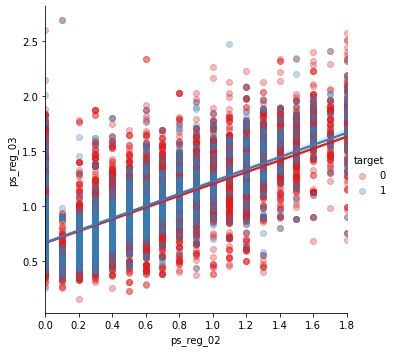

In [145]:
sns.lmplot(x='ps_reg_02',y='ps_reg_03',data=s,hue='target',palette='Set1',scatter_kws={'alpha':0.3})

#### ps_car_12 and ps_car_13

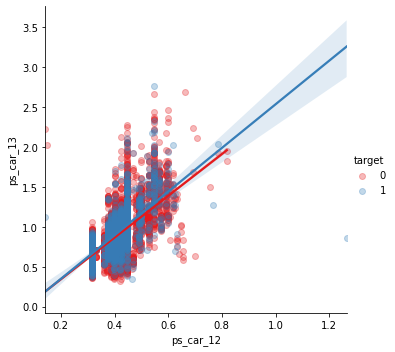

In [146]:
sns.lmplot(x='ps_car_12',y='ps_car_13',data=s,hue='target',palette='Set1',scatter_kws={'alpha':0.3})

#### ps_car_12 and ps_car_14

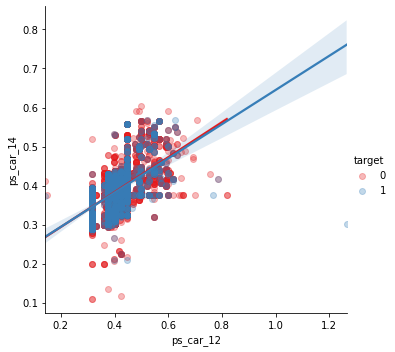

In [147]:
sns.lmplot(x='ps_car_12',y='ps_car_14',data=s,hue='target',palette='Set1',scatter_kws={'alpha':0.3})

#### ps_car_13 and ps_car_15

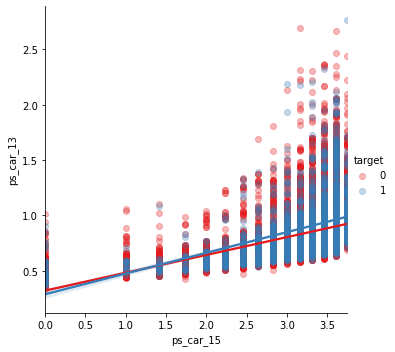

In [148]:
sns.lmplot(x='ps_car_15',y='ps_car_13',data=s,hue='target',palette='Set1',scatter_kws={'alpha':0.3})

### checking the correlations between ordinal variables

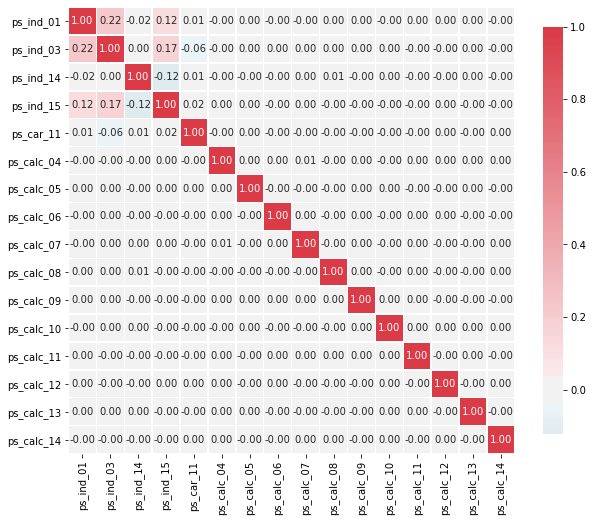

In [150]:
v = meta[(meta.level == 'ordinal') & (meta.keep)].index
corr_heatmap(v)

## Feature Engineering

### creating dummy variables

In [151]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index
print('before dummification we have {} variables in train'.format(train.shape[1]))
train = pd.get_dummies(train,columns=v,drop_first=True)
print('after  dummification we have {} variables in train'.format(train.shape[1]))

before dummification we have 57 variables in train
after  dummification we have 109 variables in train


### creating interaction variables

In [153]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
poly = PolynomialFeatures(degree=2,interaction_only=False,include_bias=False)
interactions = pd.DataFrame(poly.fit_transform(train[v]),columns=poly.get_feature_names(v))
interactions.drop(v,axis=1,inplace=True) # remove the original columns
 
# concat the interaction variables to the train data 
print('before creating interactions we have {} variables in train'.format(train.shape[1]))
train = pd.concat([train,interactions],axis=1)
print('after  creating interactions we have {} variables in train'.format(train.shape[1]))

before creating interactions we have 109 variables in train
after  creating interactions we have 164 variables in train


## feature selection

### removing features with low or zero variance

In [ ]:
# personally i perfer to let the classifier algorithm chose which features to keep.
# 